# Refer to SF EDA notebook for Price EDA (Section 5 & 10)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Import Data

In [2]:
SF_df = pd.read_pickle("pre-processing and EDA/cleaned_price_df.pkl")
SF_df.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month,price_log
0,within an hour,1.0,0.99,1,1,Western Addition,Entire apartment,Entire home/apt,3,1.0,1.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Dry...",132.0,2,30,257,97.0,1.91,4.882802
1,within a day,0.6,0.83,0,2,Bernal Heights,Entire apartment,Entire home/apt,5,1.0,2.0,3.0,"[""Smoke alarm"", ""Heating"", ""Kitchen"", ""First a...",235.0,30,60,111,98.0,0.81,5.459586
2,within a few hours,1.0,1.00,0,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",56.0,32,60,19,84.0,0.14,4.025352
3,within a few hours,1.0,1.00,0,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",56.0,32,90,8,93.0,0.11,4.025352
5,within an hour,1.0,0.96,1,2,Mission,Private room in condominium,Private room,3,1.0,1.0,1.0,"[""Heating"", ""Hot water"", ""Children\u2019s book...",169.0,1,14,736,98.0,5.47,5.129899


In [3]:
SF_df.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month,price_log
count,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6.848000e+03,6.848000e+03,6848.000000,6848.000000,6848.000000,6848.000000
mean,0.669844,0.782614,0.449328,79.741530,2.993575,1.341706,1.267085,1.654206,166.581157,1.462144e+04,1.512798e+04,46.147050,73.639603,1.085453,4.913868
std,0.446639,0.346388,0.497462,294.260178,1.739233,0.912677,0.858169,1.138384,111.840100,1.208420e+06,1.208414e+06,83.398774,40.533067,1.619329,0.639438
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,2.302585
25%,0.000000,0.750000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,88.000000,2.000000e+00,2.900000e+01,1.000000,80.000000,0.050000,4.477337
50%,1.000000,0.970000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,135.000000,3.000000e+01,1.800000e+02,9.000000,96.000000,0.330000,4.905275
75%,1.000000,1.000000,1.000000,12.000000,4.000000,1.500000,2.000000,2.000000,206.000000,3.000000e+01,1.125000e+03,53.000000,99.000000,1.510000,5.327876
max,1.000000,1.000000,1.000000,1903.000000,16.000000,10.000000,9.000000,14.000000,633.000000,1.000000e+08,1.000000e+08,821.000000,100.000000,22.670000,6.450470


# Different column names by datatype list

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = SF_df.select_dtypes(include=numerics).columns.to_list()
bool_columns = SF_df.select_dtypes(include='bool').columns.to_list()
object_columns = SF_df.select_dtypes(include='object').columns.to_list()
print(object_columns)

['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities']


In [5]:
SF_df.isnull().sum()

host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_listings_count       0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
number_of_reviews         0
review_scores_rating      0
reviews_per_month         0
price_log                 0
dtype: int64

# Pearson Correlation for Numeric Columns

In [6]:
# sns.set(style="ticks", color_codes=True)
# sns.pairplot(SF_df[numeric_columns])

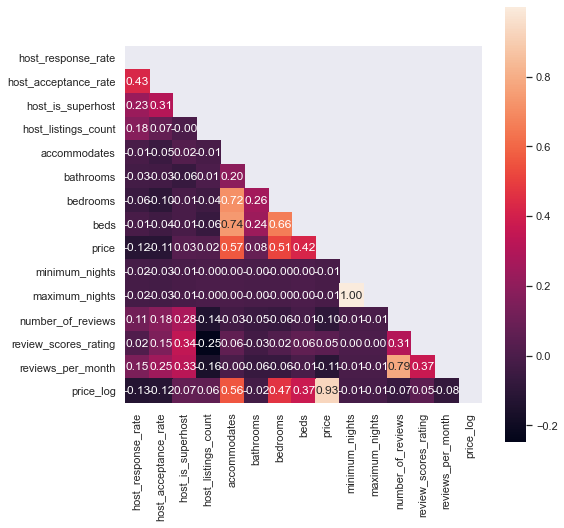

In [7]:
corr = SF_df[numeric_columns].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8,8))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=numeric_columns, yticklabels=numeric_columns, mask=mask)

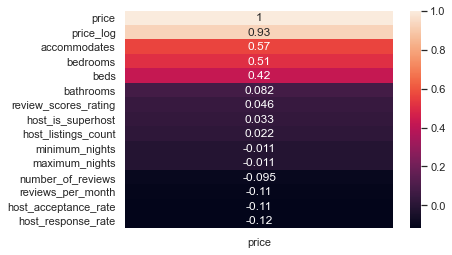

In [8]:
sns.heatmap(corr[['price']].sort_values(['price'],ascending=False),yticklabels=True,annot=True)

# Feature Selection

## Remove features based on Pearson Correlation

In [9]:
new_SF_df = SF_df.drop(columns=['bedrooms','beds','maximum_nights','number_of_reviews'])

In [10]:
print(new_SF_df.columns)

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'amenities',
       'price', 'minimum_nights', 'review_scores_rating', 'reviews_per_month',
       'price_log'],
      dtype='object')


## Remove based on p-values (Backward Elimination)

In [11]:
y = SF_df['price_log']
X = SF_df[numeric_columns].drop(['price','price_log'], axis =1)

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues.to_frame().reset_index().rename(columns={'index': 'feature', 0: 'p-value'}).sort_values(by='p-value', ascending=False)

,feature,p-value
11,number_of_reviews,2.488412e-01
9,minimum_nights,1.283259e-01
10,maximum_nights,1.281501e-01
12,review_scores_rating,8.483734e-05
2,host_acceptance_rate,5.620762e-08
13,reviews_per_month,5.421439e-09
8,beds,1.464020e-10
4,host_listings_count,3.476694e-22
3,host_is_superhost,7.910311e-23
1,host_response_rate,2.735052e-28


In [12]:
#Backward Elimination
cols = list(X.columns)
removed_features_BE = []
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05): # remove if p-value > 0.05
        cols.remove(feature_with_p_max)
        removed_features_BE.append(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print("Selected Features:")
print(selected_features_BE)
print("Removed Features:")
print(removed_features_BE)

Selected Features:
['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'reviews_per_month']
Removed Features:
['number_of_reviews', 'minimum_nights', 'maximum_nights']


In [13]:
for feature in removed_features_BE:
    if feature in new_SF_df.columns:
        new_SF_df.drop(columns=[feature],inplace=True)
print(new_SF_df.columns)
print(len(new_SF_df.columns))

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'amenities',
       'price', 'review_scores_rating', 'reviews_per_month', 'price_log'],
      dtype='object')
15


In [14]:
new_SF_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6848 entries, 0 to 7273
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      6848 non-null   object 
 1   host_response_rate      6848 non-null   float64
 2   host_acceptance_rate    6848 non-null   float64
 3   host_is_superhost       6848 non-null   int32  
 4   host_listings_count     6848 non-null   int64  
 5   neighbourhood_cleansed  6848 non-null   object 
 6   property_type           6848 non-null   object 
 7   room_type               6848 non-null   object 
 8   accommodates            6848 non-null   int64  
 9   bathrooms               6848 non-null   float64
 10  amenities               6848 non-null   object 
 11  price                   6848 non-null   float64
 12  review_scores_rating    6848 non-null   float64
 13  reviews_per_month       6848 non-null   float64
 14  price_log               6848 non-null   

In [15]:
new_SF_df_copy = new_SF_df

In [16]:
# new_SF_df = new_SF_df_copy

In [17]:
# for col in new_SF_df.columns: 
#     try:      
#         new_SF_df[col] = pd.to_numeric(new_SF_df[col]) 
#         new_SF_df.hist(column=col)
#     except ValueError:
#         print('This column can not be represented as a histogram')

# Data Pre-processing for non-numeric columns

In [18]:
new_SF_df["amenities"] = new_SF_df["amenities"].str.replace('"', "")
new_SF_df["amenities"] = new_SF_df["amenities"].str.replace("[", "")
new_SF_df["amenities"] = new_SF_df["amenities"].str.replace("]", "")

new_SF_df['amenities']

0       Heating, Hot water, Stove, Iron, Dryer, Coffee...
1       Smoke alarm, Heating, Kitchen, First aid kit, ...
2       Host greets you, Heating, Hot water, Kitchen, ...
3       Host greets you, Heating, Hot water, Kitchen, ...
5       Heating, Hot water, Children\u2019s books and ...
                              ...                        
7269    Smoke alarm, Long term stays allowed, Refriger...
7270    Smoke alarm, Long term stays allowed, Refriger...
7271    Gym, Heating, Air conditioning, Iron, Dryer, C...
7272    Gym, Heating, Hot water, Stove, Air conditioni...
7273    Smoke alarm, Refrigerator, Heating, Kitchen, W...
Name: amenities, Length: 6848, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(', '))
amenities = count_vectorizer.fit_transform(new_SF_df['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

In [20]:
len(df_amenities.columns.to_list())

115

In [21]:
df_amenities.columns.to_list()

['air conditioning',
 'alarm system',
 'baby bath',
 'baby monitor',
 'babysitter recommendations',
 'baking sheet',
 'barbecue utensils',
 'bathroom essentials',
 'bathtub',
 'bbq grill',
 'beach essentials',
 'beachfront',
 'bed linens',
 'bedroom comforts',
 'bread maker',
 'breakfast',
 'breakfast bar',
 'building staff',
 'cable tv',
 'carbon monoxide alarm',
 'changing table',
 'children\\u2019s books and toys',
 'children\\u2019s dinnerware',
 'cleaning before checkout',
 'coffee maker',
 'cooking basics',
 'crib',
 'desk',
 'dishes and silverware',
 'dishwasher',
 'dryer',
 'dual vanity',
 'elevator',
 'essentials',
 'ethernet connection',
 'ev charger',
 'extra pillows and blankets',
 'fire extinguisher',
 'fireplace guards',
 'first aid kit',
 'free parking on premises',
 'free street parking',
 'full kitchen',
 'game console',
 'garden or backyard',
 'gas fireplace',
 'gym',
 'hair dryer',
 'hangers',
 'heating',
 'high chair',
 'host greets you',
 'hot tub',
 'hot water',
 

In [22]:
df_amenities

,air conditioning,alarm system,baby bath,baby monitor,babysitter recommendations,baking sheet,barbecue utensils,bathroom essentials,bathtub,bbq grill,...,table corner guards,terrace,tv,walk in closet,washer,waterfront,wet bar,wifi,window guards,wine cooler
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6844,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6845,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6846,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [23]:
new_SF_df_wo_amenity_df = new_SF_df.drop(columns=['amenities'])
new_SF_df_wo_amenity_df

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,price,review_scores_rating,reviews_per_month,price_log
0,within an hour,1.0,0.99,1,1,Western Addition,Entire apartment,Entire home/apt,3,1.0,132.0,97.0,1.91,4.882802
1,within a day,0.6,0.83,0,2,Bernal Heights,Entire apartment,Entire home/apt,5,1.0,235.0,98.0,0.81,5.459586
2,within a few hours,1.0,1.00,0,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,56.0,84.0,0.14,4.025352
3,within a few hours,1.0,1.00,0,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,56.0,93.0,0.11,4.025352
5,within an hour,1.0,0.96,1,2,Mission,Private room in condominium,Private room,3,1.0,169.0,98.0,5.47,5.129899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,within a few hours,1.0,1.00,0,92,Mission,Entire apartment,Entire home/apt,2,1.0,71.0,0.0,0.00,4.262680
7270,within a few hours,1.0,1.00,0,92,Downtown/Civic Center,Entire apartment,Entire home/apt,2,1.0,62.0,0.0,0.00,4.127134
7271,-,0.0,0.00,0,0,Lakeshore,Entire townhouse,Entire home/apt,6,3.0,399.0,0.0,0.00,5.988961
7272,-,0.0,0.00,0,1,South of Market,Private room in apartment,Private room,1,1.0,120.0,0.0,0.00,4.787492


In [24]:
from sklearn import preprocessing
for column in new_SF_df_wo_amenity_df.columns:
    if new_SF_df_wo_amenity_df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        new_SF_df_wo_amenity_df[column] = le.fit_transform(new_SF_df_wo_amenity_df[column])
        
new_SF_df_wo_amenity_df

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,price,review_scores_rating,reviews_per_month,price_log
0,4,1.0,0.99,1,1,36,3,0,3,1.0,132.0,97.0,1.91,4.882802
1,2,0.6,0.83,0,2,1,3,0,5,1.0,235.0,98.0,0.81,5.459586
2,3,1.0,1.00,0,10,11,19,2,2,4.0,56.0,84.0,0.14,4.025352
3,3,1.0,1.00,0,10,11,19,2,2,4.0,56.0,93.0,0.11,4.025352
5,4,1.0,0.96,1,2,16,24,2,3,1.0,169.0,98.0,5.47,5.129899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,3,1.0,1.00,0,92,16,3,0,2,1.0,71.0,0.0,0.00,4.262680
7270,3,1.0,1.00,0,92,6,3,0,2,1.0,62.0,0.0,0.00,4.127134
7271,0,0.0,0.00,0,0,14,16,0,6,3.0,399.0,0.0,0.00,5.988961
7272,0,0.0,0.00,0,1,31,19,2,1,1.0,120.0,0.0,0.00,4.787492


In [25]:
listings_new = pd.concat([new_SF_df_wo_amenity_df, df_amenities], axis=1, join='inner')
listings_new.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,table corner guards,terrace,tv,walk in closet,washer,waterfront,wet bar,wifi,window guards,wine cooler
0,4,1.0,0.99,1,1,36,3,0,3,1.0,...,0,0,1,0,1,0,0,1,0,0
1,2,0.6,0.83,0,2,1,3,0,5,1.0,...,0,0,0,0,1,0,0,1,0,0
2,3,1.0,1.00,0,10,11,19,2,2,4.0,...,0,0,1,0,1,0,0,1,0,0
3,3,1.0,1.00,0,10,11,19,2,2,4.0,...,0,0,1,0,1,0,0,1,0,0
5,4,1.0,0.96,1,2,16,24,2,3,1.0,...,0,0,1,0,1,0,0,1,0,0


In [26]:
listings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6465 entries, 0 to 6847
Columns: 129 entries, host_response_time to wine cooler
dtypes: float64(7), int32(5), int64(117)
memory usage: 6.3 MB


## Converting bool to numeric

In [27]:
listings_new.to_pickle('listings_for_analysis_with_labelencoder_corr_pvalue_log.pkl')


pickle_listings_new_df = pd.read_pickle('listings_for_analysis_with_labelencoder_corr_pvalue_log.pkl')
pickle_listings_new_df.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,table corner guards,terrace,tv,walk in closet,washer,waterfront,wet bar,wifi,window guards,wine cooler
0,4,1.0,0.99,1,1,36,3,0,3,1.0,...,0,0,1,0,1,0,0,1,0,0
1,2,0.6,0.83,0,2,1,3,0,5,1.0,...,0,0,0,0,1,0,0,1,0,0
2,3,1.0,1.00,0,10,11,19,2,2,4.0,...,0,0,1,0,1,0,0,1,0,0
3,3,1.0,1.00,0,10,11,19,2,2,4.0,...,0,0,1,0,1,0,0,1,0,0
5,4,1.0,0.96,1,2,16,24,2,3,1.0,...,0,0,1,0,1,0,0,1,0,0


# Train/Test split

In [28]:
from sklearn.model_selection import train_test_split
y = listings_new['price_log'] # target/dependent variable
x = listings_new.drop(['price','price_log'], axis =1) # independent variables

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

# Random Forest

## Train/Test w Random Forest Algorithm

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 0.389
R^2 test: 0.615


## Feature Importance of Random Forest Algorithm

In [30]:
coefs_df = pd.DataFrame()
coefs_df['feature'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,feature,coefs
8,accommodates,0.283836
7,room_type,0.144681
6,property_type,0.083726
4,host_listings_count,0.062092
11,reviews_per_month,0.051393
9,bathrooms,0.044921
5,neighbourhood_cleansed,0.041919
10,review_scores_rating,0.034631
2,host_acceptance_rate,0.033411
1,host_response_rate,0.027850


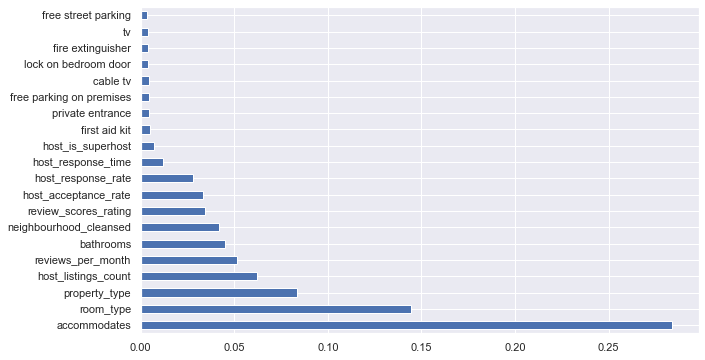

In [31]:
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))

# LightGBM

## Train/Test w LightGBM

In [32]:
from lightgbm import LGBMRegressor


fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }
        
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')
        
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

Training until validation scores don't improve for 20 rounds
[100]	valid's rmse: 0.446599
[200]	valid's rmse: 0.403863
[300]	valid's rmse: 0.390064
[400]	valid's rmse: 0.38173
[500]	valid's rmse: 0.37701
[600]	valid's rmse: 0.374157
[700]	valid's rmse: 0.372267
[800]	valid's rmse: 0.370839
[900]	valid's rmse: 0.370238
Early stopping, best iteration is:
[930]	valid's rmse: 0.370105
R^2 test: 0.650


## Feature Importance of LightGBM

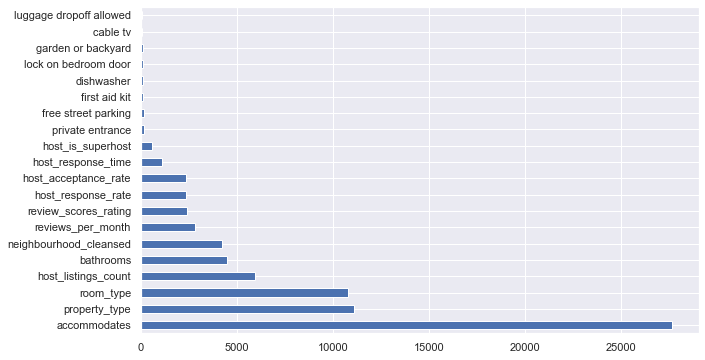

In [33]:
feat_imp = pd.Series(clf.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))

In [34]:
coefs_df = pd.DataFrame()
coefs_df['feature'] = x.columns
coefs_df['coefs'] = clf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,feature,coefs
8,accommodates,27649.148494
6,property_type,11081.677700
7,room_type,10795.167436
4,host_listings_count,5965.722903
9,bathrooms,4505.379628
5,neighbourhood_cleansed,4222.425359
11,reviews_per_month,2834.182622
10,review_scores_rating,2404.680470
1,host_response_rate,2373.347881
2,host_acceptance_rate,2372.200395


# Gradient Boosting

## Train/Test w Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor


gboost = GradientBoostingRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3)
gboost.fit(X_train, y_train)
y_train_pred = gboost.predict(X_train)
y_test_pred = gboost.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 0.375
R^2 test: 0.641


## Feature Importance of Gradient Boosting

In [36]:
coefs_df = pd.DataFrame()
coefs_df['feature'] = X_train.columns
coefs_df['coefs'] = gboost.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,feature,coefs
8,accommodates,0.342078
7,room_type,0.179675
6,property_type,0.102987
4,host_listings_count,0.078210
9,bathrooms,0.061445
5,neighbourhood_cleansed,0.051171
11,reviews_per_month,0.034742
1,host_response_rate,0.032428
10,review_scores_rating,0.030436
2,host_acceptance_rate,0.024767


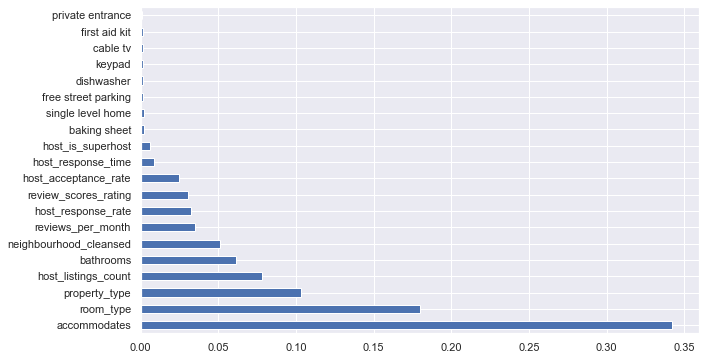

In [37]:
feat_imp = pd.Series(gboost.feature_importances_, index=X_train.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))

# XGBoost and its Feature Importance


Training MSE: 0.0249
Validation MSE: 0.1509
Validation RMSE: 0.3884

Training r2: 0.9396
Validation r2: 0.6149


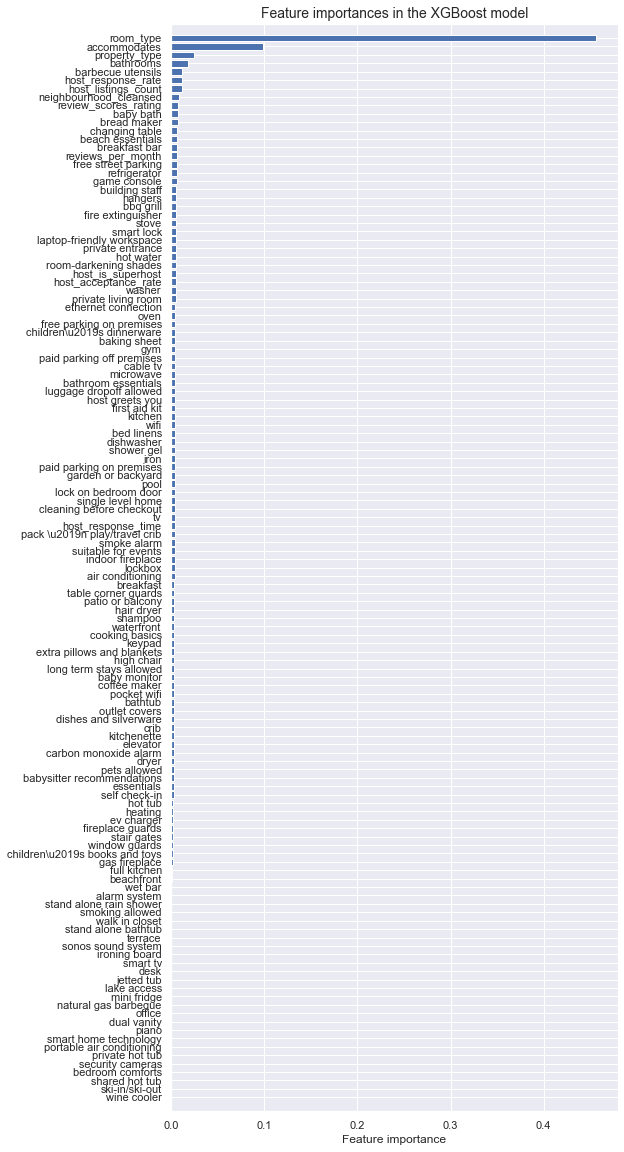

In [38]:
import xgboost as xgb

# Fitting the model
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

# Printing the results

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_xgb_reg)**0.5,4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

# Neural Network Model

In [39]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(512, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Printing the model summary
print(nn2.summary())

# Visualising the neural network
SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

# Training the model
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               16384     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 247,297
Trainable params: 247,297
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
18/18 [==============================] - 0s 26ms/step - loss: 100.8086 - mean_squared_error: 100.80

18/18 [==============================] - 0s 10ms/step - loss: 0.2152 - mean_squared_error: 0.2152 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 46/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1895 - mean_squared_error: 0.1895 - val_loss: 0.2164 - val_mean_squared_error: 0.2164
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1826 - mean_squared_error: 0.1826 - val_loss: 0.2155 - val_mean_squared_error: 0.2155
Epoch 48/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1995 - mean_squared_error: 0.1995 - val_loss: 0.4261 - val_mean_squared_error: 0.4261
Epoch 49/100
18/18 [==============================] - 0s 9ms/step - loss: 0.2632 - mean_squared_error: 0.2632 - val_loss: 0.2361 - val_mean_squared_error: 0.2361
Epoch 50/100
18/18 [==============================] - 0s 9ms/step - loss: 0.2132 - mean_squared_error: 0.2132 - val_loss: 0.2688 - val_mean_squared_error: 0.2688
Epoch 51/100
18/18 [====================

18/18 [==============================] - 0s 9ms/step - loss: 0.1492 - mean_squared_error: 0.1492 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 0.1701 - mean_squared_error: 0.1701 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 97/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1682 - mean_squared_error: 0.1682 - val_loss: 0.3465 - val_mean_squared_error: 0.3465
Epoch 98/100
18/18 [==============================] - 0s 12ms/step - loss: 0.2209 - mean_squared_error: 0.2209 - val_loss: 0.2567 - val_mean_squared_error: 0.2567
Epoch 99/100
18/18 [==============================] - 0s 11ms/step - loss: 0.1684 - mean_squared_error: 0.1684 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 100/100
18/18 [==============================] - 0s 11ms/step - loss: 0.1584 - mean_squared_error: 0.1584 - val_loss: 0.2295 - val_mean_squared_error: 0.2295


In [40]:
y_test_pred = nn2.predict(X_test)
y_train_pred = nn2.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_test_pred)**0.5,4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.1796
Validation MSE: 0.2986
Validation RMSE: 0.5464

Training r2: 0.5636
Validation r2: 0.2379


# Distribution of Numeric Columns

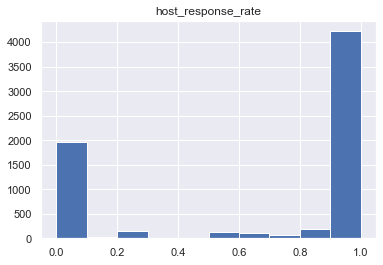

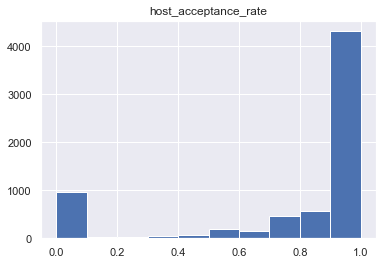

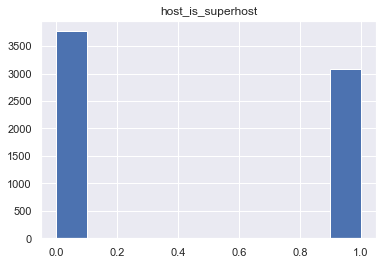

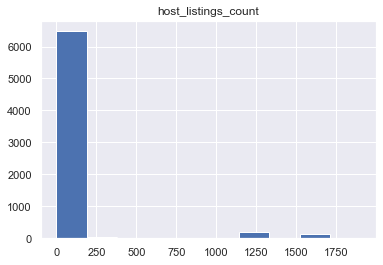

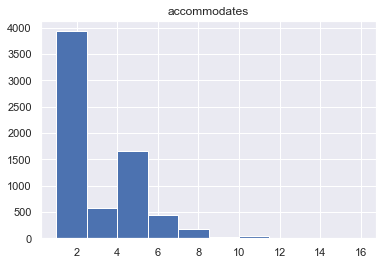

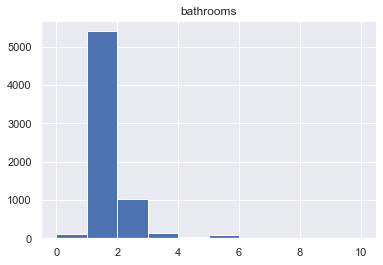

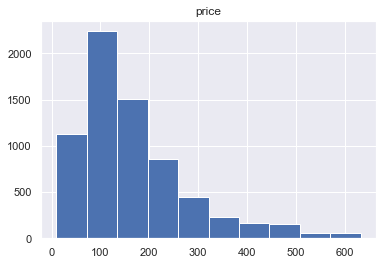

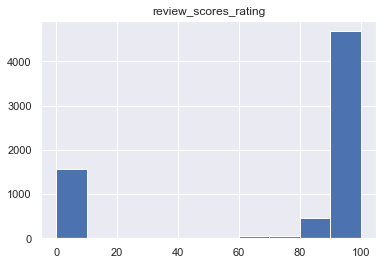

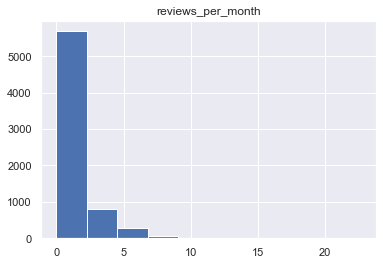

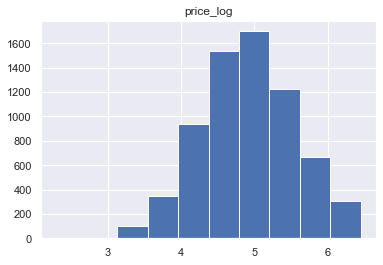

In [41]:
new_numeric_cols = []
for col in new_SF_df.columns: 
    if col in numeric_columns:
        new_numeric_cols.append(col)
        try:      
            new_SF_df[col] = pd.to_numeric(new_SF_df[col]) 
            new_SF_df.hist(column=col)
        except ValueError:
            print('This column can not be represented as a histogram')

# Standardizing Features

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train.values) # only scaler.fit on train set
X_stand_train = scaler.transform(X_train.values)
X_stand_test = scaler.transform(X_test.values)

# Random Forest after Standardization

In [43]:
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_stand_train, y_train)
y_train_pred = rf.predict(X_stand_train)
y_test_pred = rf.predict(X_stand_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 0.389
R^2 test: 0.615


# LightGBM after Standardization

In [44]:
fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_stand_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }
        
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')
        
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_stand_train, y_train.values, **fit_params)
y_pred = clf.predict(X_stand_test)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

Training until validation scores don't improve for 20 rounds
[100]	valid's rmse: 0.446599
[200]	valid's rmse: 0.403863
[300]	valid's rmse: 0.390064
[400]	valid's rmse: 0.38173
[500]	valid's rmse: 0.37701
[600]	valid's rmse: 0.374157
[700]	valid's rmse: 0.372267
[800]	valid's rmse: 0.370839
[900]	valid's rmse: 0.370238
Early stopping, best iteration is:
[930]	valid's rmse: 0.370105
R^2 test: 0.650


# LassoCV Model

In [45]:
from sklearn.linear_model import Lasso, LassoCV

# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_stand_train, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [46]:
# R2 of Training set
lasso_model.score(X_stand_train,y_train)

# Predict model on test data
y_pred = lasso_model.predict(X_stand_test)

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
print('MAE: %.3f' % mae(y_test, y_pred))

rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

MAE: 0.388
RMSE test: 0.483
R^2 test: 0.405


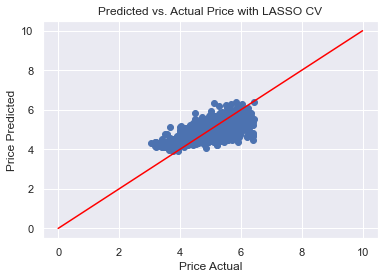

In [47]:
plt.scatter(y_test, y_pred)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with LASSO CV')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual')

# RidgeCV Model

In [48]:
from sklearn.linear_model import RidgeCV

reg_params = 10.**np.linspace(-10, 5, 10)
ridge_model = RidgeCV(alphas=reg_params, fit_intercept=True, cv=5)
ridge_model.fit(X_stand_train, y_train)

RidgeCV(alphas=array([1.00000000e-10, 4.64158883e-09, 2.15443469e-07, 1.00000000e-05,
       4.64158883e-04, 2.15443469e-02, 1.00000000e+00, 4.64158883e+01,
       2.15443469e+03, 1.00000000e+05]),
        cv=5)

In [51]:
# R2 of Training set
ridge_model.score(X_stand_train,y_train)

# Predict model on test data
y_pred = ridge_model.predict(X_stand_test)

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
print('MAE: %.3f' % mae(y_test, y_pred))

rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

MAE: 0.389
RMSE test: 0.487
R^2 test: 0.395


Text(0.5, 0, 'Price Actual')

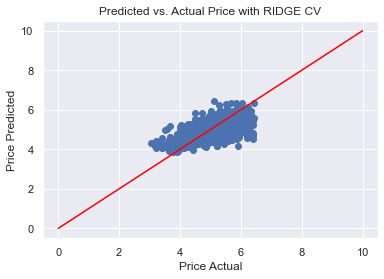

In [53]:
plt.scatter(y_test, y_pred)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with RIDGE CV')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual')